### Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка файла

In [5]:
fandango = pd.read_csv('fandango_scrape.csv')
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


# 1. Изучение данных о сайте Fandango

In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### Связь между популярностью фильма и его рейтингом

<Axes: xlabel='RATING', ylabel='VOTES'>

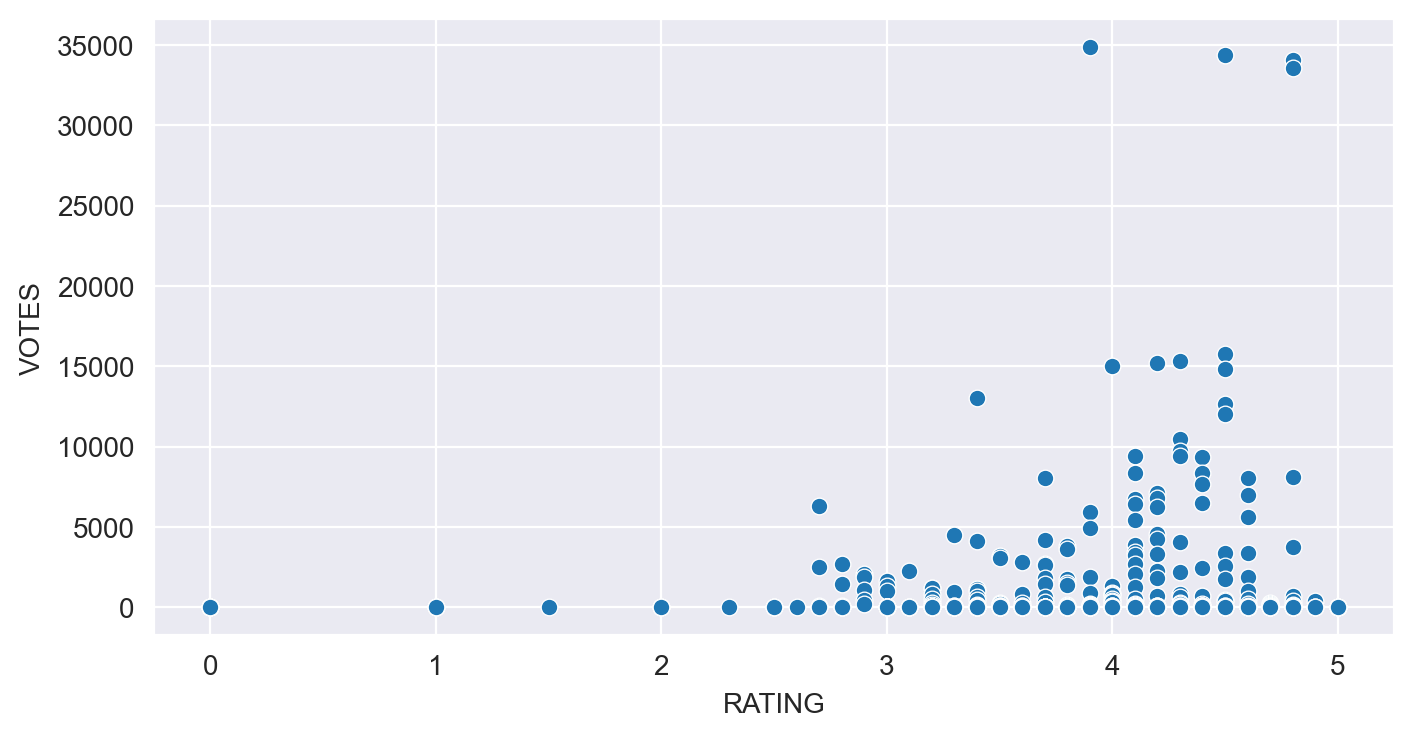

In [13]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=fandango, x='RATING', y='VOTES')

### Корреляция данных

In [11]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


### Добавляем колонку YEAR

In [14]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')', ''))
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


### Разбивка фильмов по годам

In [16]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

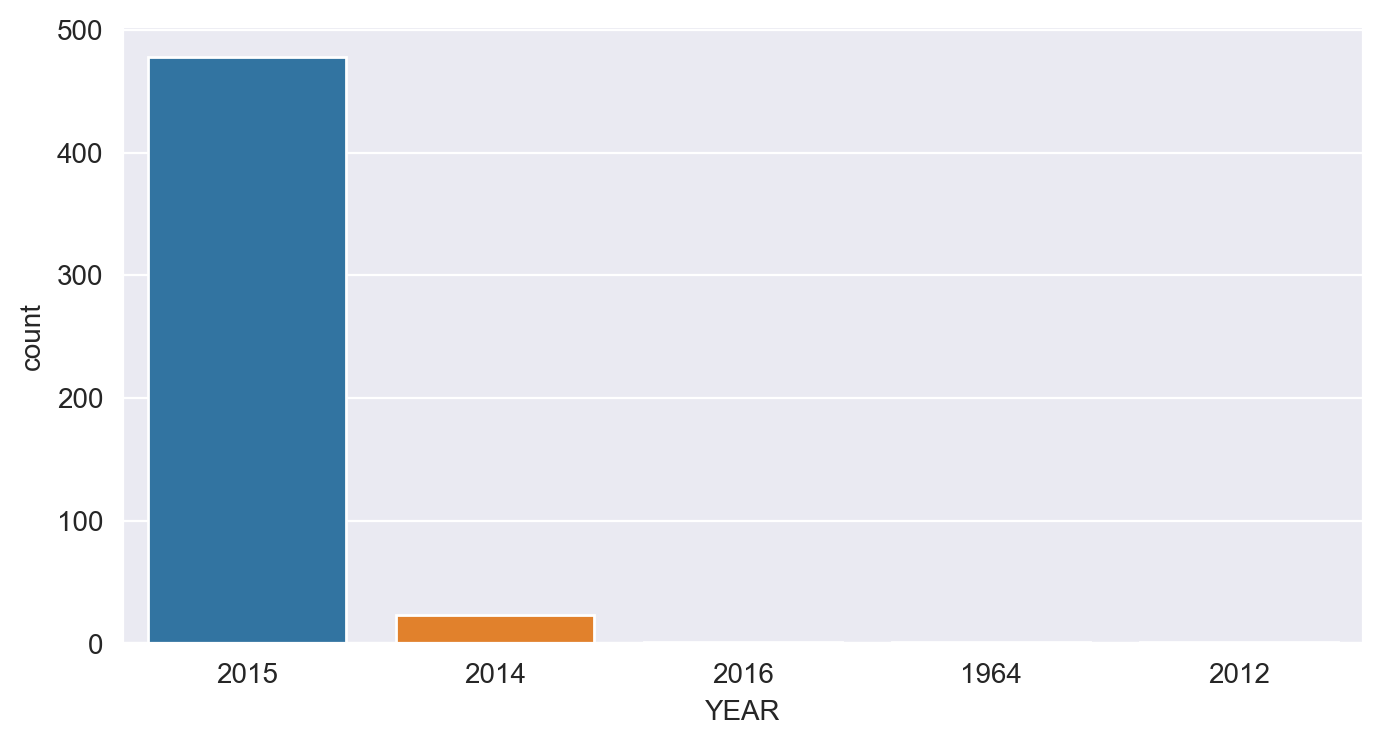

In [19]:
plt.figure(figsize=(8,4), dpi=200)
sns.countplot(data=fandango, x='YEAR', hue='YEAR')

### 10 фильмов с наибольшим количеством голосов

In [22]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### Количество фильмов без голосов

In [24]:
len(fandango[fandango['VOTES'] == 0])

69

### Удаление фильмов с нулевым количеством голосов

In [26]:
fan_reviewed = fandango[fandango['VOTES'] > 0]

### График KDE plot, который отображает распределение отображаемых рейтингов (STARS) и истинных рейтингов на основе голосов пользователей (RATING).

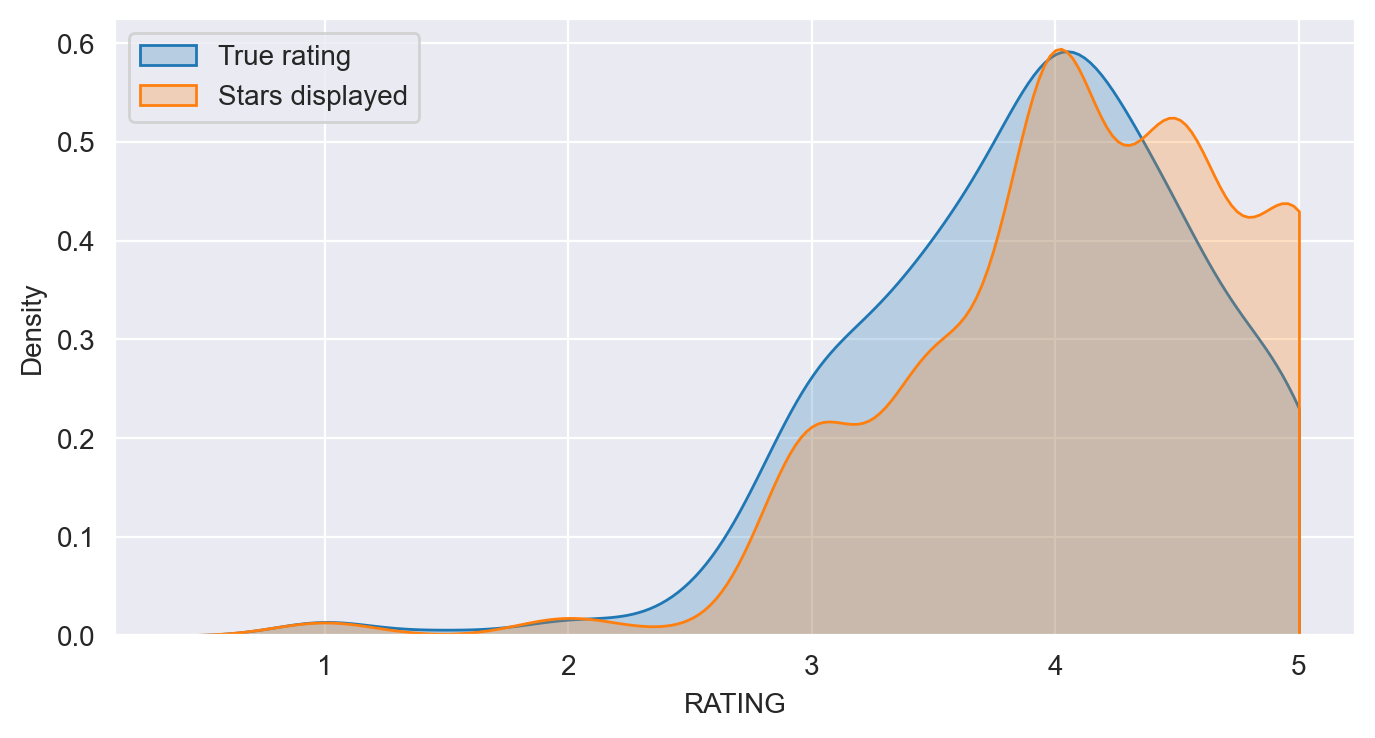

In [36]:
plt.figure(figsize=(8,4), dpi=200)
sns.kdeplot(data=fan_reviewed, x='RATING', fill=True, clip=[0, 5], label='True rating')
sns.kdeplot(data=fan_reviewed, x='STARS', fill=True, clip=[0, 5], label='Stars displayed')
plt.legend()

### Pазница в численном виде между колонками STARS и RATING

In [37]:
fan_reviewed['STARS_DIF'] = round(fan_reviewed['STARS'] - fandango['RATING'], 1)
fan_reviewed.head()

C:\Users\solo\AppData\Local\Temp\ipykernel_11328\2216292749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIF'] = round(fan_reviewed['STARS'] - fandango['RATING'], 1)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


<Axes: xlabel='STARS_DIF', ylabel='count'>

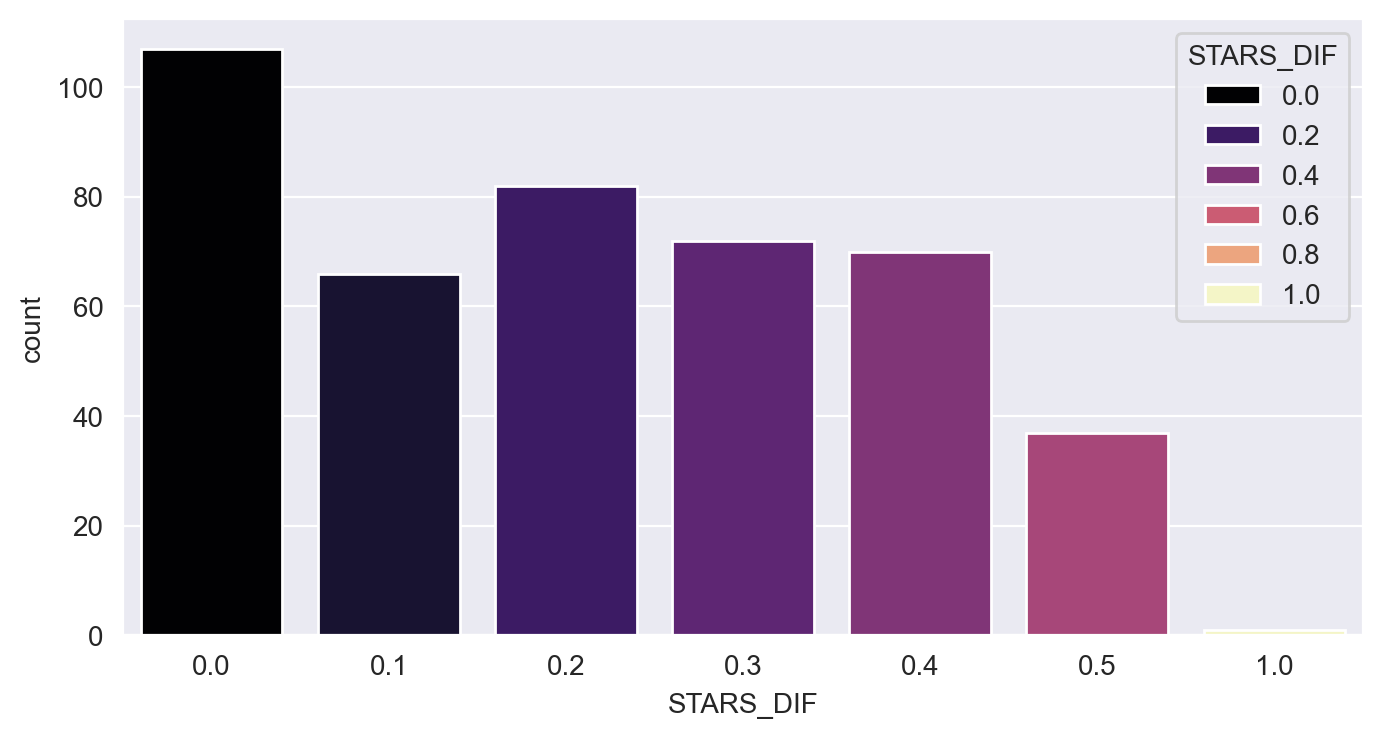

In [40]:
plt.figure(figsize=(8,4), dpi=200)
sns.countplot(data=fan_reviewed, x='STARS_DIF', hue='STARS_DIF', palette='magma')

### Фильм, в котором разница в рейтинге равна единице

In [42]:
fan_reviewed[fan_reviewed['STARS_DIF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# 2. Изучение данных о рейтингах других компаний

### Загрузка данных

In [43]:
all_sites = pd.read_csv('all_sites_scores.csv')
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [45]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


## Рейтинги от Rotten Tomatoes и Rotten Tomatoes User

### График scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами

(0.0, 100.0)

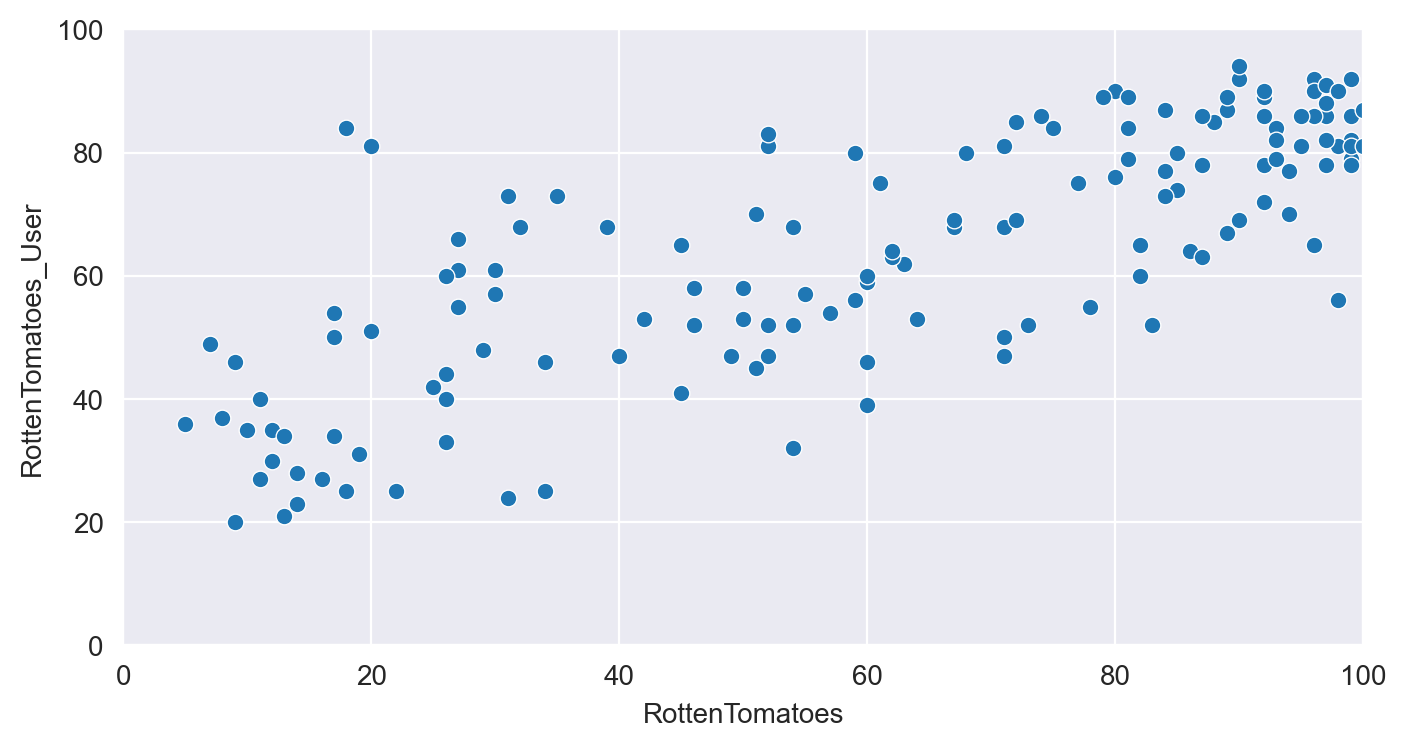

In [48]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.xlim(0, 100)
plt.ylim(0, 100)

### Pазница в численном виде между колонками RottenTomatoes-RottenTomatoes_User.

In [49]:
all_sites['Rotten_Diff'] = round(all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User'], 1)
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


### Средняя абсолютная разница между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes

In [50]:
all_sites['Rotten_Diff'].apply(abs).mean()

np.float64(15.095890410958905)

### График распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

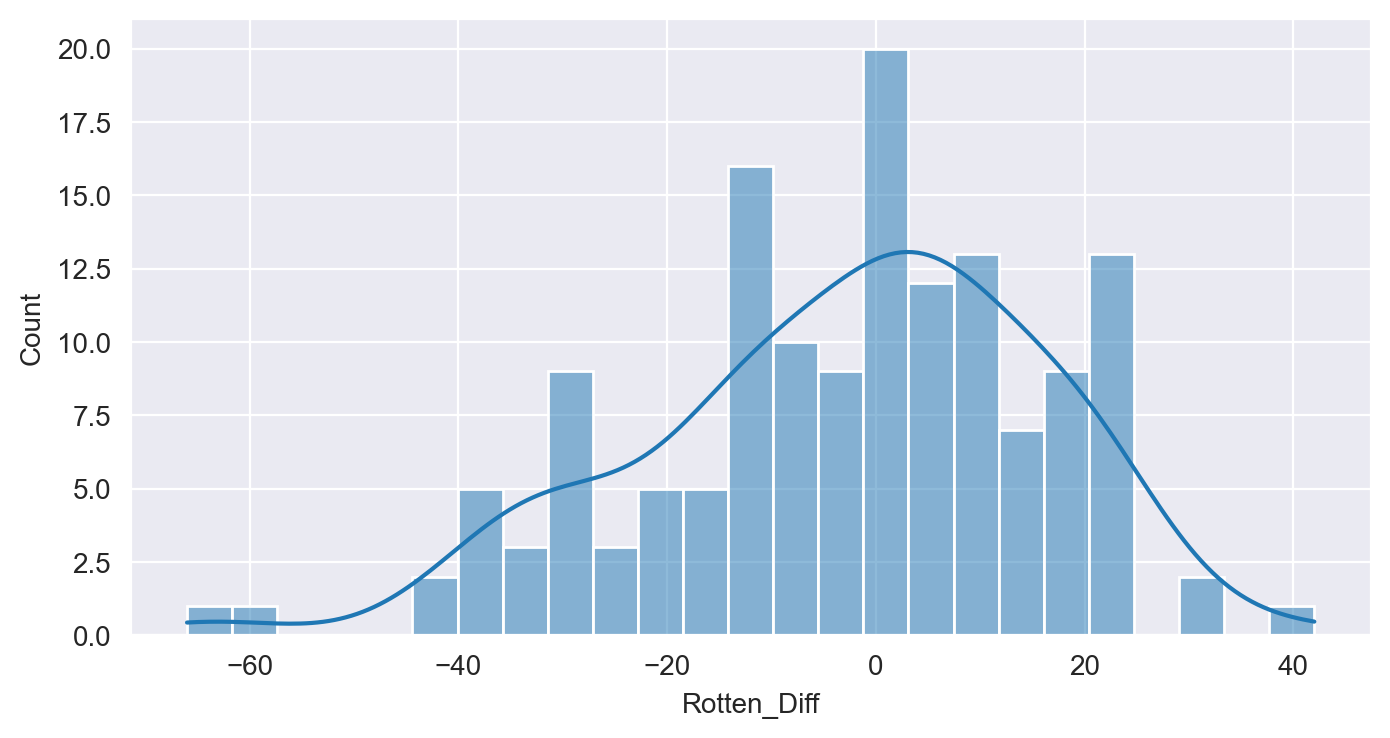

In [53]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25)

### График распределения *абсолютных значений* разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

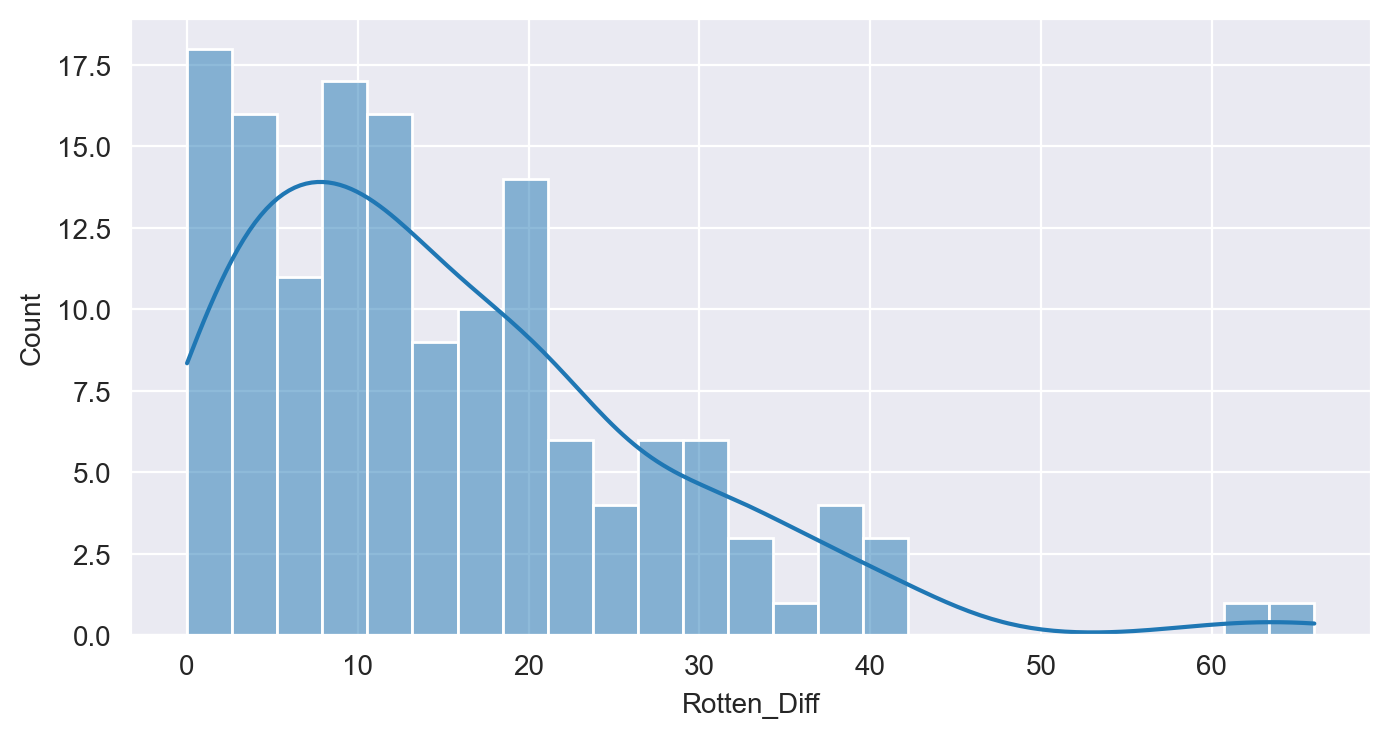

In [55]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), kde=True, bins=25)

### 5 фильмов, которые в среднем были  выше всего оценены пользователями, по сравнению с оценками от критиков:

In [56]:
all_sites.nsmallest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


### 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей

In [57]:
all_sites.nlargest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## Рейтинги от Metacritic и Metacritic User

### График scatterplot для сравнения рейтингов Metacritic и Metacritic User.

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

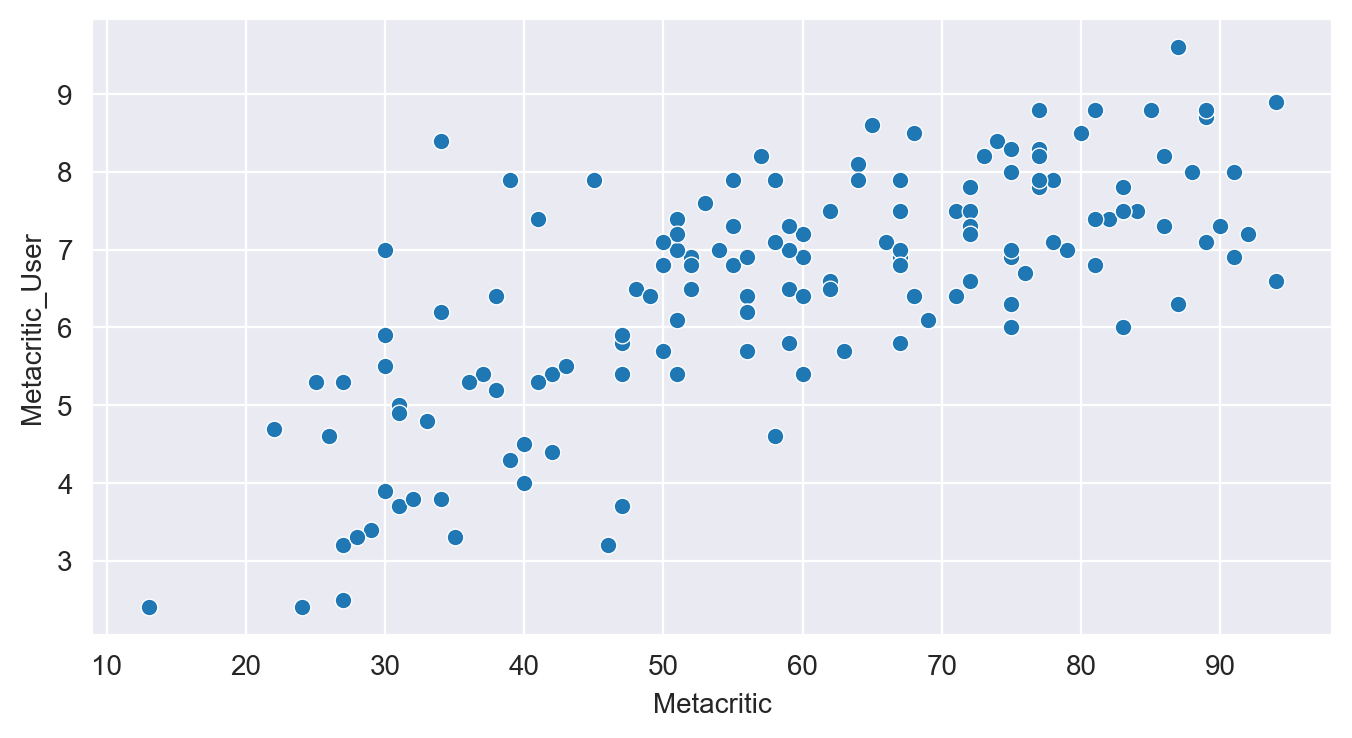

In [58]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')

## Рейтинги от IMDB

### График scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB.

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

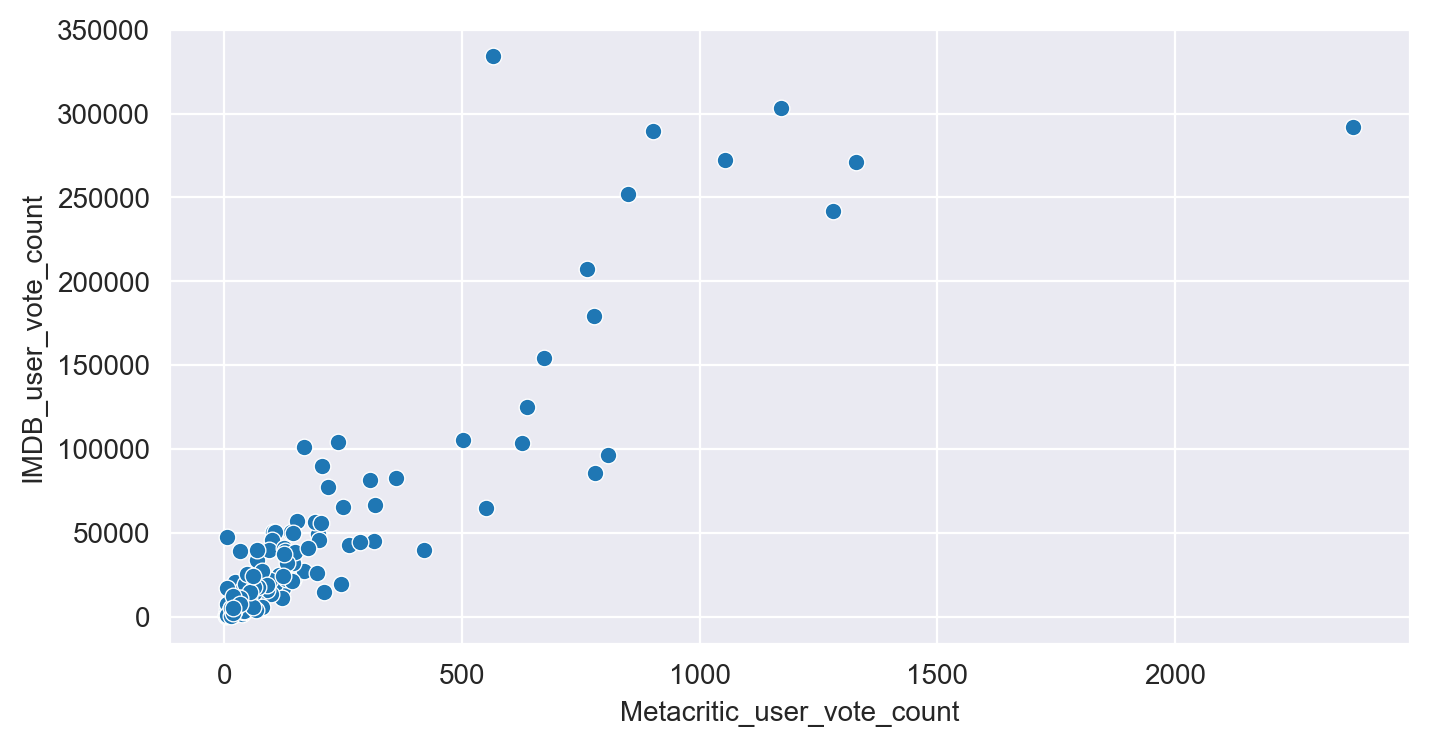

In [60]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

# Сравнение рейтингов Fandango с рейтингами других компаний